In [97]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

temp = os.getcwd()
print(f'Current working directory: {temp}')
if '/project1' in temp:
    temp = temp.replace('/project1', '')
    os.chdir(temp)
    print(f'Switched to: {temp}')

In [98]:
data = pd.read_excel('data/QualidadeARO3.xlsx')
data = data.drop(columns='Ihavo')
rng = pd.date_range('1/1/2020 00:00', periods=8784, freq='1H')
data.index = rng

### 1. Antas-Espinho Analysis

/Users/marco/anaconda3/envs/ts/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


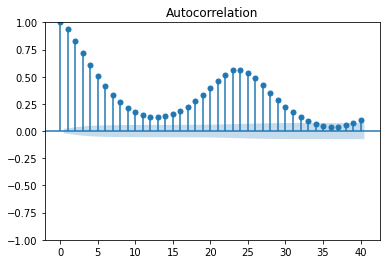

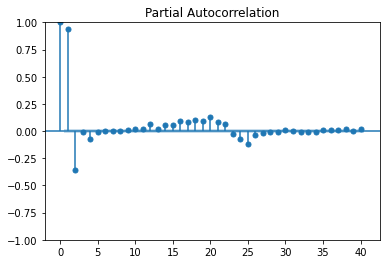

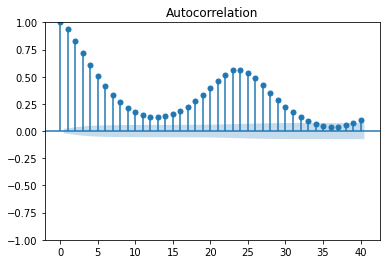

In [99]:
antas = data['Antas-Espinho']
plot_pacf(antas)
plot_acf(antas)

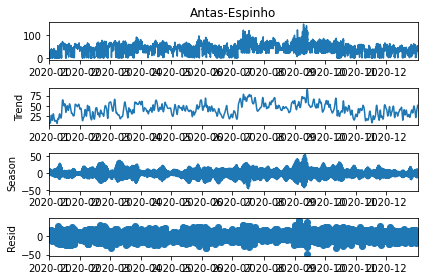

In [100]:
res = STL(antas).fit()
res.plot()
plt.show()

we see that we have a strong trend which indicates the non stationarity of the time series
thus we apply differencing to remove the trend component  

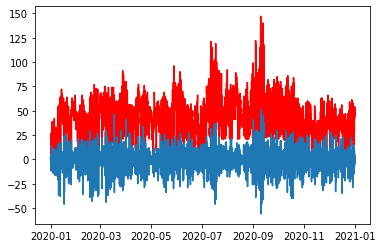

In [101]:
#antas = np.log(antas)
antas = antas.diff()
antas = antas[1:]
plt.plot(data.index, data['Antas-Espinho'], color='red')
plt.plot(antas)


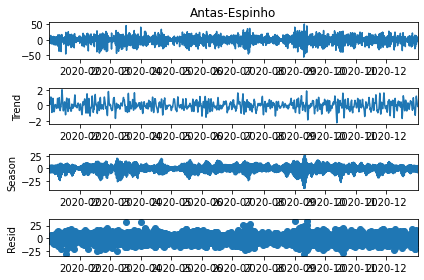

In [102]:
res = STL(antas).fit()
res.plot()
plt.show()

/Users/marco/anaconda3/envs/ts/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


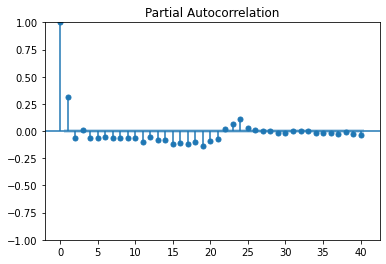

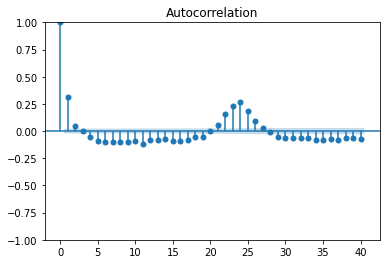

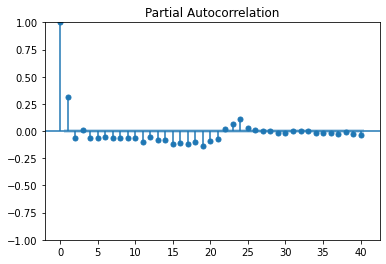

In [103]:
plot_acf(antas)
plot_pacf(antas)